In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

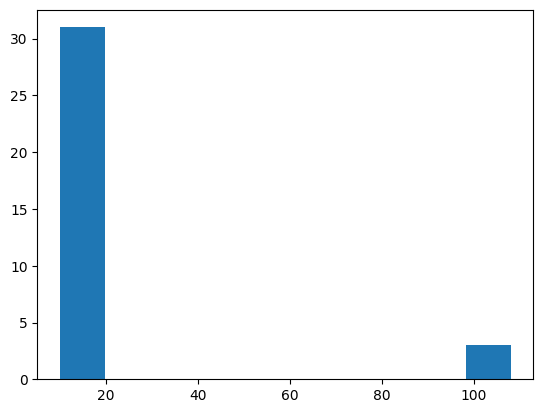

In [3]:
plt.hist(dataset)

In [4]:
# dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [5]:
outliers = []

def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std

        if z_score > threshold:
            outliers.append(i)

    return outliers

In [6]:
detect_outliers(dataset)

[102, 107, 108]

# Finding Outlier by IQR
#### 1. Sort The Data
#### 2. Calculate Q1(25%) & Q3(75%)
#### 3. IQR = Q3 - Q1
#### 4. Lower Fence = Q1 - 1.5(IQR)
#### 5. High Fence = Q3 + 1.5(IQR)

In [7]:
dataset = np.sort(dataset)
print("Dataset : ", dataset)

Q1,Q3 = np.percentile(dataset,[25,75])
print("\nQ1 : ", Q1,"\nQ3 : " , Q3)

IQR = Q3 - Q1
print("\nIQR : ", IQR)

Higher_Fence = Q3 + 1.5*(IQR)
Lower_Fence = Q1 - 1.5*(IQR)
print("\nLower Fence : ", Lower_Fence , "\nHigher Fence : ", Higher_Fence)

Dataset :  [ 10  10  10  10  10  11  11  12  12  12  12  12  12  12  13  13  13  13
  14  14  14  14  14  14  15  15  15  15  15  17  19 102 107 108]

Q1 :  12.0 
Q3 :  15.0

IQR :  3.0

Lower Fence :  7.5 
Higher Fence :  19.5


In [8]:
outliers = []
for i in dataset:
    if i > Higher_Fence or i < Lower_Fence:
        outliers.append(i)

print(outliers)

[np.int64(102), np.int64(107), np.int64(108)]


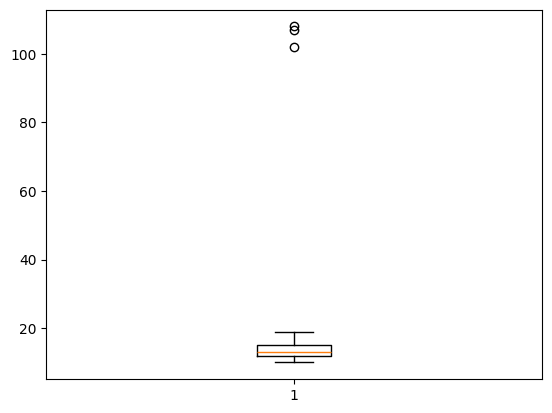

In [9]:
plt.boxplot(dataset)
plt.show()

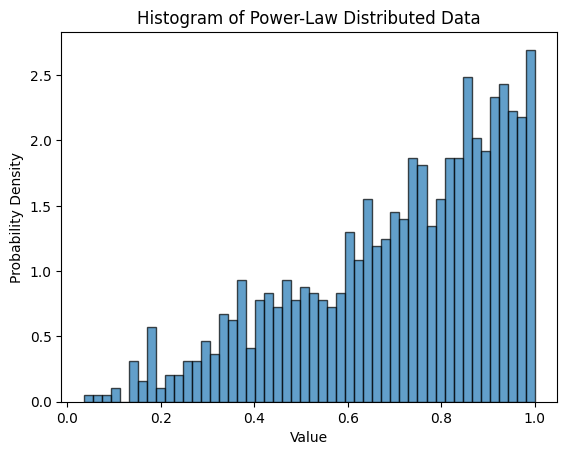

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.5  # Exponent
size = 1000  # Number of samples

# Generate power-law distributed data
data = np.random.power(alpha, size=size)

# Plot histogram
plt.hist(data, bins=50, density=True, edgecolor='k', alpha=0.7)
plt.title('Histogram of Power-Law Distributed Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


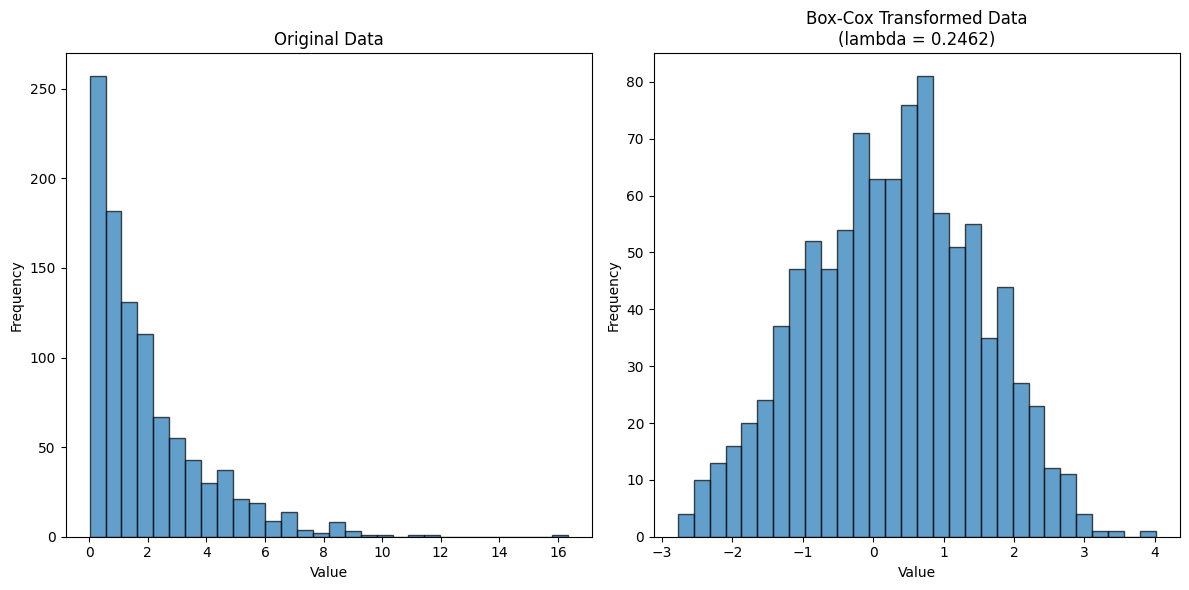

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Generate example data
np.random.seed(42)
data = np.random.exponential(scale=2, size=1000)  # Exponential data (right-skewed)

# Apply Box-Cox transformation
transformed_data, lambda_ = stats.boxcox(data)

# Plot original and transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Original Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Box-Cox Transformed Data\n(lambda = {lambda_:.4f})')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


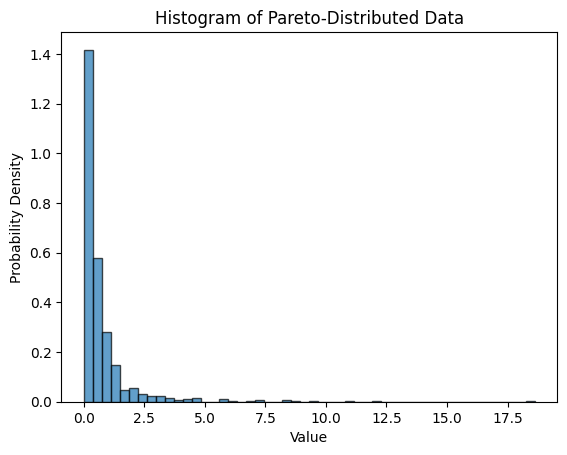

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.5  # Shape parameter
x_m = 1.0    # Scale parameter
size = 1000   # Number of samples

# Generate Pareto-distributed data
data = np.random.pareto(alpha, size=size) * x_m

# Plot histogram
plt.hist(data, bins=50, density=True, edgecolor='k', alpha=0.7)
plt.title('Histogram of Pareto-Distributed Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


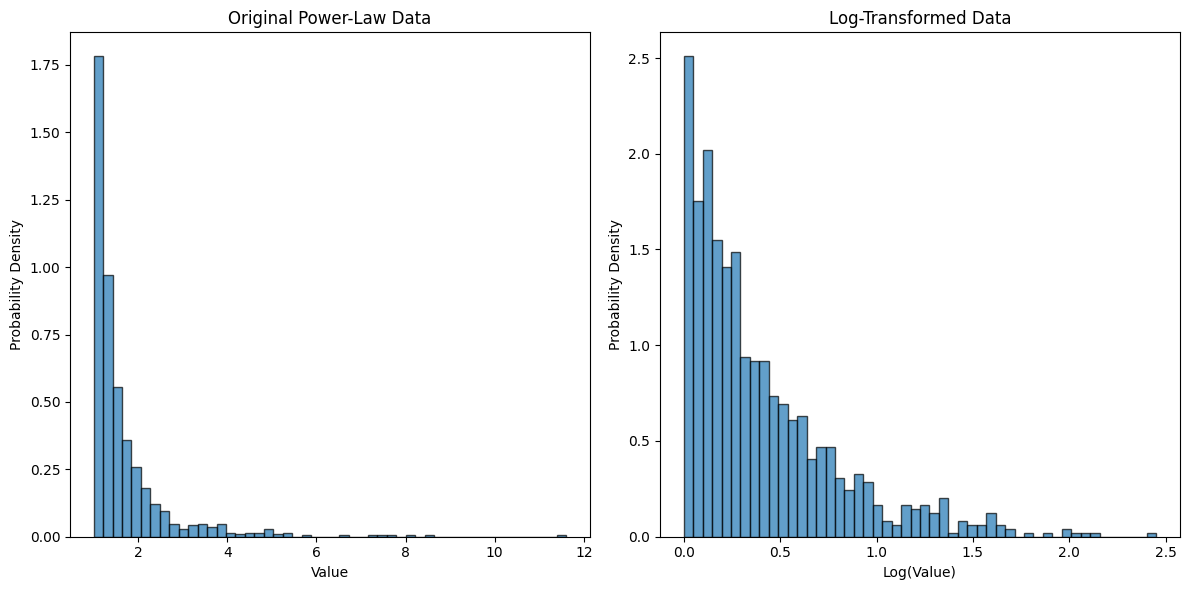

Shapiro-Wilk Test: Statistic=0.8406, p-value=0.0000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate power-law distributed data
alpha = 2.5
size = 1000
data = np.random.pareto(alpha, size=size) + 1  # Shift to avoid zero values

# Apply log transformation
log_data = np.log(data)

# Plot histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=50, density=True, edgecolor='k', alpha=0.7)
plt.title('Original Power-Law Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.subplot(1, 2, 2)
plt.hist(log_data, bins=50, density=True, edgecolor='k', alpha=0.7)
plt.title('Log-Transformed Data')
plt.xlabel('Log(Value)')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

# Check normality of log-transformed data
stat, p_value = stats.shapiro(log_data)
print(f'Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p_value:.4f}')


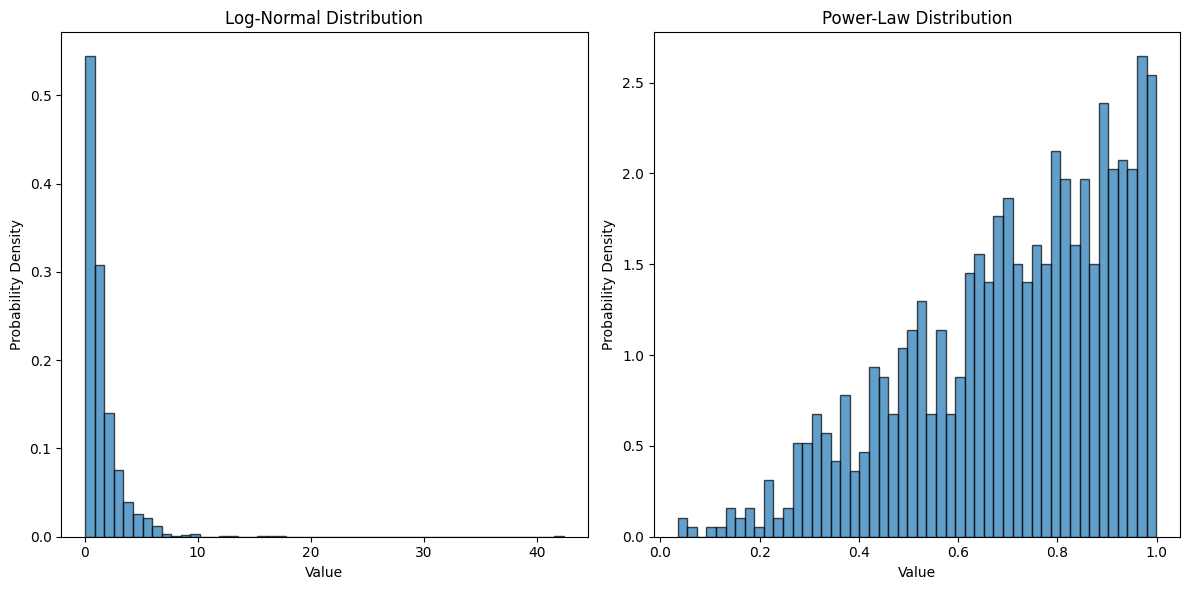

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, powerlaw

# Parameters
shape = 0.954  # Standard deviation of the log of the log-normal distribution
scale = 1      # Mean of the log of the log-normal distribution
alpha = 2.5    # Exponent for the power-law distribution
size = 1000    # Number of samples

# Generate data
data_lognormal = np.random.lognormal(mean=0, sigma=shape, size=size)
data_powerlaw = np.random.power(alpha, size=size)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_lognormal, bins=50, density=True, edgecolor='k', alpha=0.7)
plt.title('Log-Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.subplot(1, 2, 2)
plt.hist(data_powerlaw, bins=50, density=True, edgecolor='k', alpha=0.7)
plt.title('Power-Law Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()
